This Notebook is created by [Moussa Jamor](https://www.github.com/jamormoussa)

Notebook link (Github): [AutoEncoders in Deep Learning](https://www.github.com/jamormoussa/learn-DeepLearning)

# AutoEncoders Architecture In DeepLearning

## What is AutoEncoders ?

### Introduction

The **AutoEncoders** are special type of neural networks used for unsupervised learning. They composed by two main components, the **Encoder** and the **Decoder**, which both are neural networks architecture. In this notebook, you will have everything need to know about **AutoEncoders**, including the theory as well as build a **AutoEncoder** model using PyTorch, the dataset we'll use is **MNIST** dataset. As well as, see What's some AutoEncoders's applications.

<center>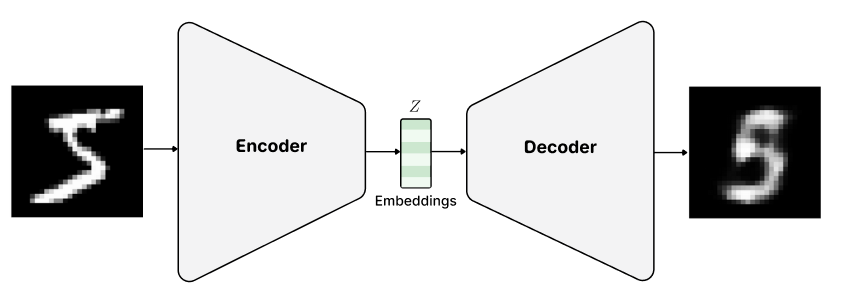

First, the **AutoEncoders** proposed by *G. E. Hinton and R. R. Salakhutdinov* in paper titled [Reducing the Dimensionality of Data with Neural Networks](https://sci-hub.ru/https://www.science.org/doi/10.1126/science.1127647). They proposed the AutoEncoders as ***Non-Linear generatisation of PCA***, dimentionality reduction cases. But, AutoEncoders has widely used in other applications, **Transfer Leaning**, **Generative Models**, **Anomaly Detection** and more.

## Build AutoEncoders Model with MNIST Datset

In [4]:
import torch, torch.nn as nn
import torch.optim as optim 
from torch.utils.data import DataLoader, random_split, Subset

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

### Define some Helping Functions

In [5]:
# define function to plot handwrite digits images 

def imshow_image(tensor: torch.Tensor) -> None:
    plt.imshow(tensor.detach().view(28, 28).numpy())

In [6]:
def plot_subplots(
    images: torch.Tensor,
) -> None:

    max_cols = 8

    fig, axes = plt.subplots(1, max_cols, figsize=(18, 2))

    num_cols = images.shape[0]

    img = images.detach().numpy()

    for col in range(num_cols):
        if col >= max_cols: break
        axes[col].imshow(img[1 + col])
    plt.show()

### Load MNSIT Dataset

In [7]:
mnist = datasets.MNIST('../files/', download=False, 
                      transform= transforms.Compose([
                          transforms.ToTensor(),
                          nn.Flatten()
                      ])
        )

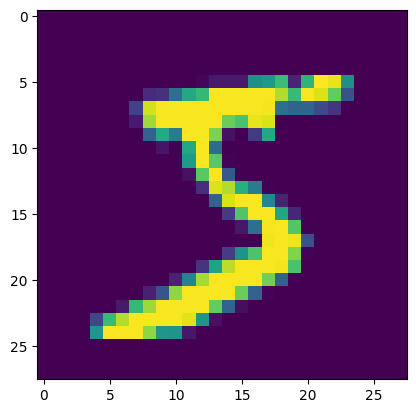

In [8]:
imshow_image(mnist[0][0])

## Split Dataset

In [9]:
train_data, test_data = random_split(mnist, [50000, 10000])

In [10]:
batch_size = 25


train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10000, shuffle=True)

In [12]:
input, _ = next(iter(train_loader))

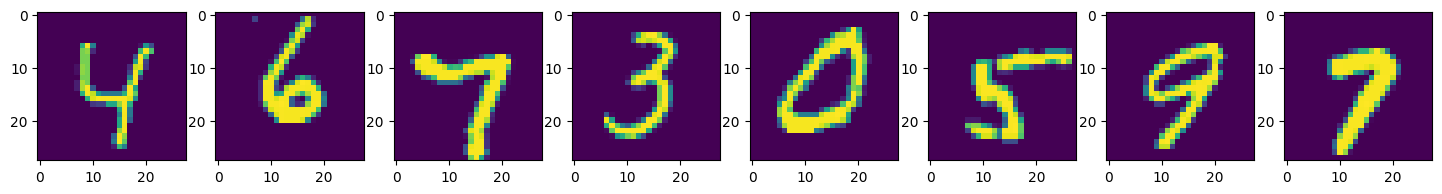

In [55]:
plot_subplots(input.squeeze(1).view(-1, 28, 28))

## Build The AutoEncoder Model

### Define The Encoder Model

In [14]:
class Encoder(nn.Module):

    def __init__(self, input_size: int = 28*28, embeddings_size = 10) -> None:
        super(Encoder, self).__init__()

        self.conv_encoder = nn.Sequential(
            nn.Conv2d(1, 10, 3),
            nn.Conv2d(10, 8, 3),
            nn.ReLU(),
            nn.Conv2d(8, 4, 7),
            nn.Flatten(1, -1),
        )

        self.linear_encoder = nn.Sequential(
            nn.Linear(4 * 18 * 18, 128),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, embeddings_size)
        )

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        out = input.view(-1, 1, 28, 28)
        out = self.conv_encoder(out)
        return self.linear_encoder(out)

In [15]:
encoder = Encoder()

In [16]:
input, _ = next(iter(train_loader))

In [17]:
mnist[0][0].shape

torch.Size([1, 784])

In [18]:
input.view(-1,1, 28, 28).shape

torch.Size([25, 1, 28, 28])

In [19]:
encoder(input).shape

torch.Size([25, 10])

### Define The Decoder Model

In [20]:
class Decoder(nn.Module):
    def __init__(self, input_size: int = 10, embeddings_size=10):
        super(Decoder, self).__init__()
        
        self.linear_decoder = nn.Sequential(
            nn.Linear(embeddings_size, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 4 * 18 * 18),
            nn.Unflatten(1, (4, 18, 18))
        )

        self.conv_decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 8, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 10, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(10, 1, 3),
        )

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        out = self.linear_decoder(input)
        return self.conv_decoder(out.view(-1, 4, 18, 18))


In [21]:
decoder = Decoder()

In [22]:
img = decoder(torch.randn(1, 10))

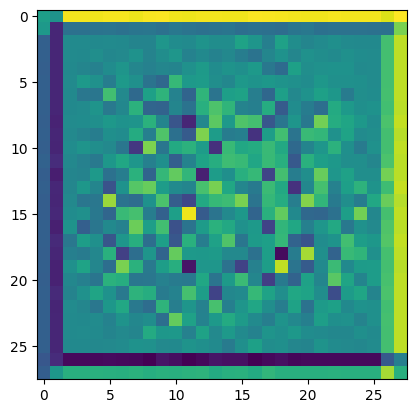

In [23]:
imshow_image(img)

## Build The AutoEncoder Model:

In [35]:
class AutoEncoderCNN(nn.Module):

    def __init__(self, input_size=28*28, embeddings_size=100) -> None:
        super(AutoEncoderCNN, self).__init__()

        self.encoder = Encoder(input_size, embeddings_size)
        self.decoder = Decoder(embeddings_size=embeddings_size)

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        out = self.encoder(input)
        return self.decoder(out)

In [36]:
model = AutoEncoderCNN()

In [37]:
model

AutoEncoderCNN(
  (encoder): Encoder(
    (conv_encoder): Sequential(
      (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
      (1): Conv2d(10, 8, kernel_size=(3, 3), stride=(1, 1))
      (2): ReLU()
      (3): Conv2d(8, 4, kernel_size=(7, 7), stride=(1, 1))
      (4): Flatten(start_dim=1, end_dim=-1)
    )
    (linear_encoder): Sequential(
      (0): Linear(in_features=1296, out_features=128, bias=True)
      (1): Linear(in_features=128, out_features=32, bias=True)
      (2): ReLU()
      (3): Linear(in_features=32, out_features=100, bias=True)
    )
  )
  (decoder): Decoder(
    (linear_decoder): Sequential(
      (0): Linear(in_features=100, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=1296, bias=True)
      (5): Unflatten(dim=1, unflattened_size=(4, 18, 18))
    )
    (conv_decoder): Sequential(
      (0): ConvTranspose2d(4, 8, kernel_size=(7, 7)

In [38]:
img = model(mnist[0][0])

In [39]:
img.shape

torch.Size([1, 1, 28, 28])

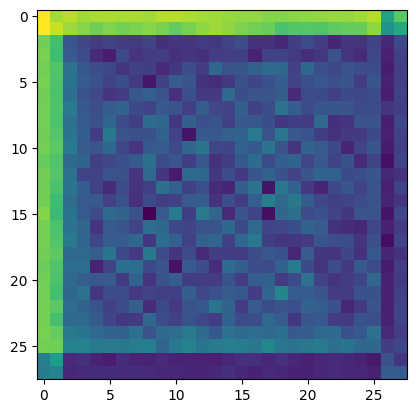

In [40]:
imshow_image(img)

## Train Model 

### Define Loss and Optimizer

In [41]:
criterion = nn.MSELoss()

In [42]:
params_to_optimize = [
    {'params': model.encoder.parameters()},
    {'params': model.decoder.parameters()}
]

In [43]:
opt = optim.Adam(params_to_optimize,lr=0.001)


### Train Loop

In [44]:
def train(
    model,
    criterion,
    optimizer,
    train_loader,
    epochs=1,
    loggings: bool = True, 
    loggings_iter: int = 400,
) -> None:
    
    model.train()
    
    for epoch in range(epochs):
        
        for i, (img, _) in enumerate(train_loader):
        
            optimizer.zero_grad()
        
            gen_img = model(img)
            
            loss = criterion(gen_img.flatten(2,-1), img)
            
            loss.backward()
            
            optimizer.step()

            if i%int(loggings_iter)==0:
                print(f"Epochs: {epoch:4d} | Iteration: {i:4d}| Loss: {loss.item():4.7f}")
                print("-"*140)
                plot_subplots(img.squeeze(1).view(-1, 28, 28))
                plot_subplots(gen_img.squeeze(1).view(-1, 28, 28))

    print("-"*140)
    print("Traning is finished :) ")

Epochs:    0 | Iteration:    0| Loss: 0.1784750
--------------------------------------------------------------------------------------------------------------------------------------------


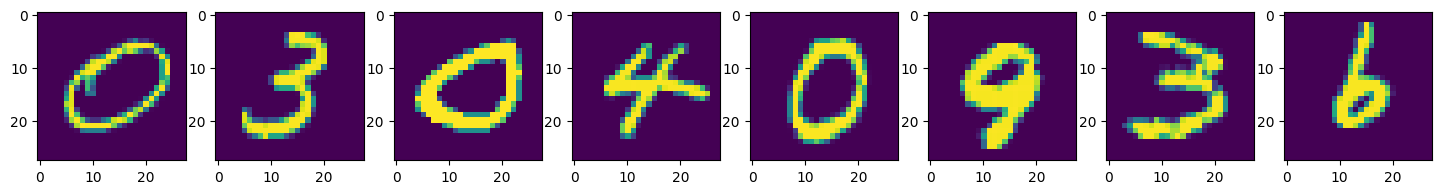

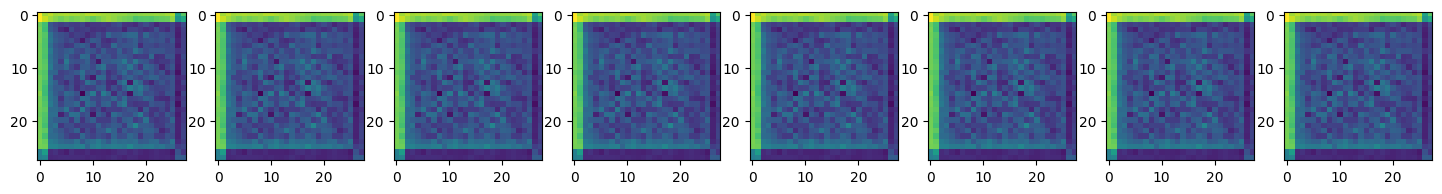

Epochs:    0 | Iteration:  400| Loss: 0.0308111
--------------------------------------------------------------------------------------------------------------------------------------------


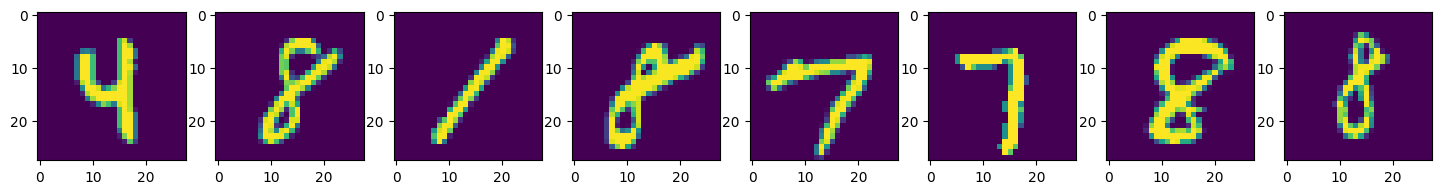

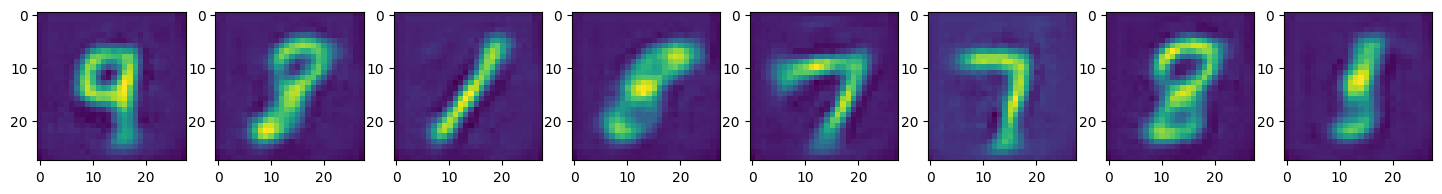

Epochs:    0 | Iteration:  800| Loss: 0.0243708
--------------------------------------------------------------------------------------------------------------------------------------------


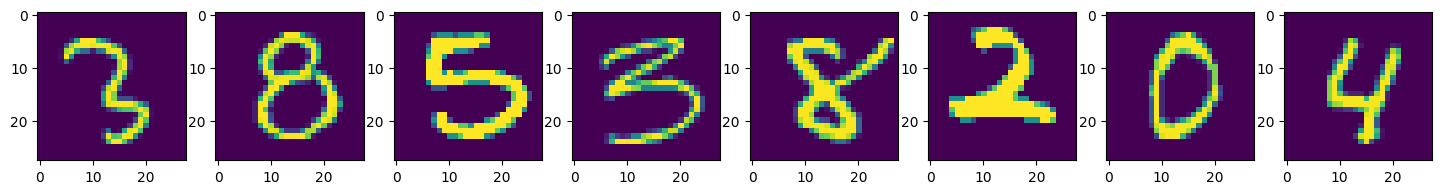

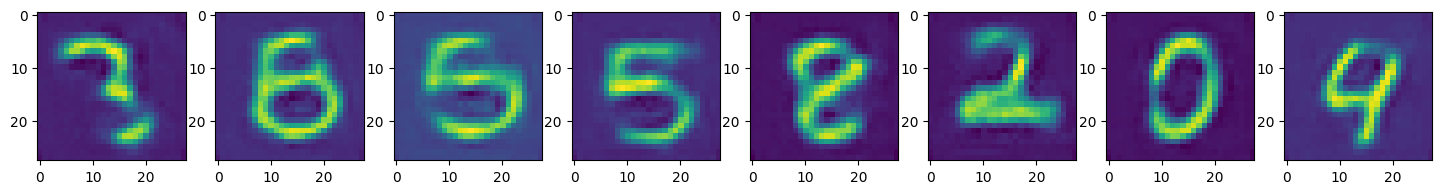

Epochs:    0 | Iteration: 1200| Loss: 0.0209465
--------------------------------------------------------------------------------------------------------------------------------------------


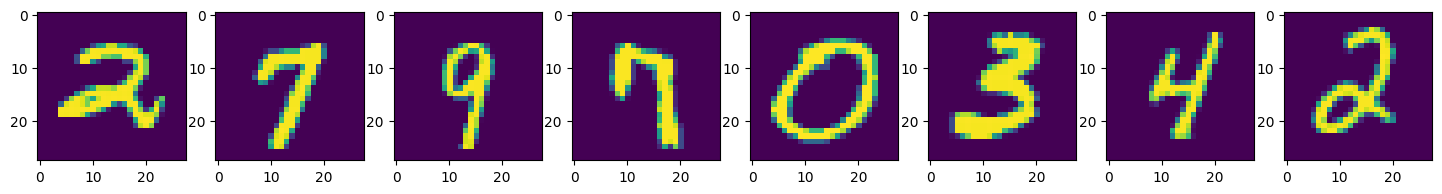

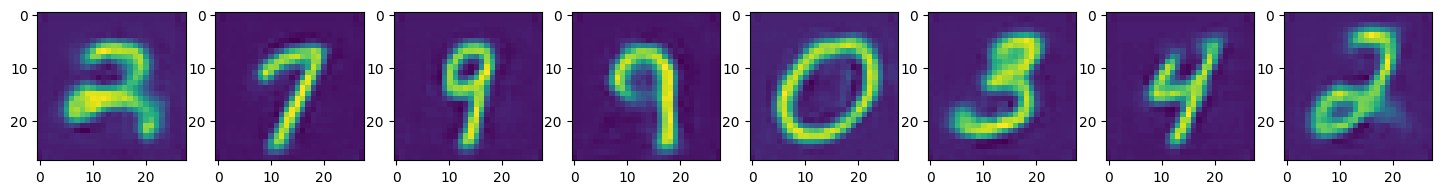

Epochs:    0 | Iteration: 1600| Loss: 0.0146847
--------------------------------------------------------------------------------------------------------------------------------------------


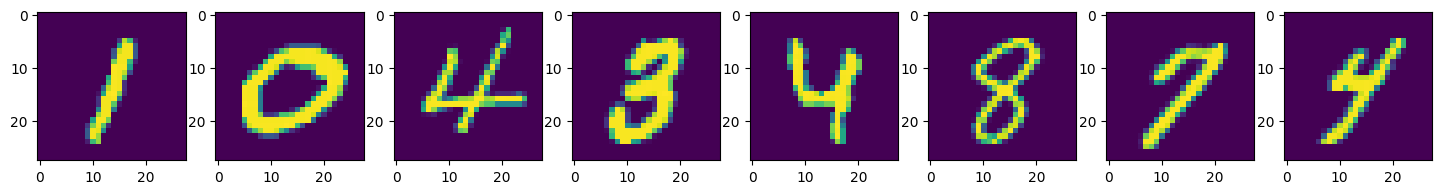

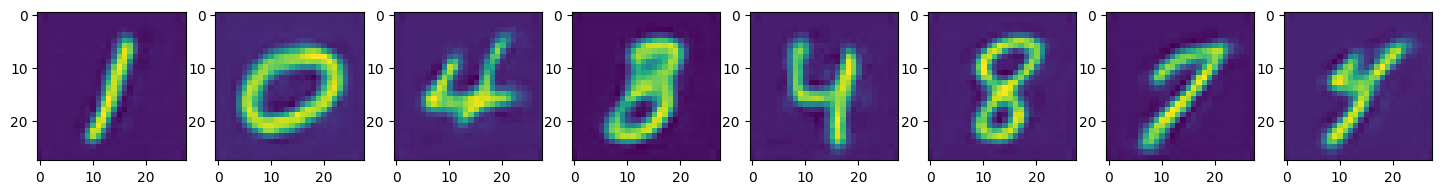

Epochs:    1 | Iteration:    0| Loss: 0.0173223
--------------------------------------------------------------------------------------------------------------------------------------------


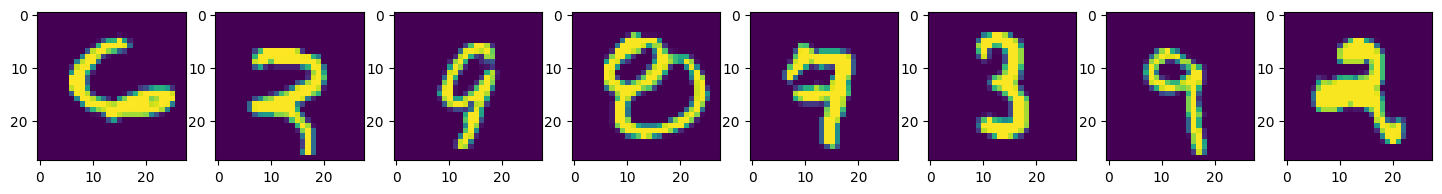

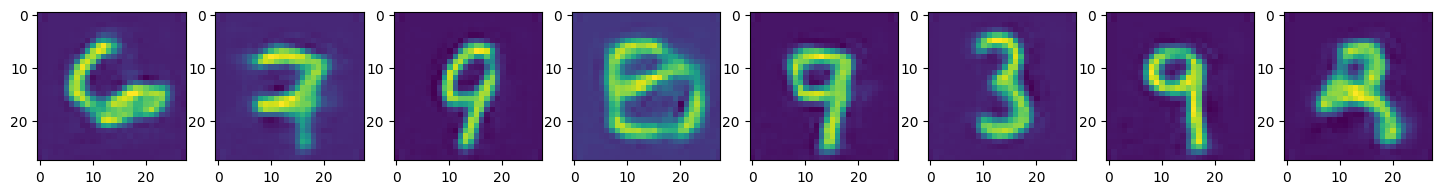

Epochs:    1 | Iteration:  400| Loss: 0.0148911
--------------------------------------------------------------------------------------------------------------------------------------------


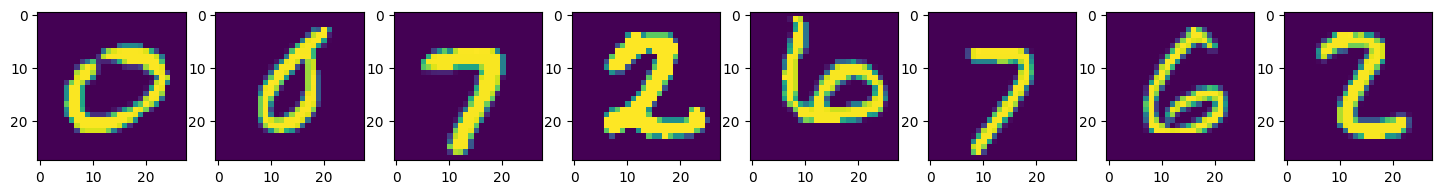

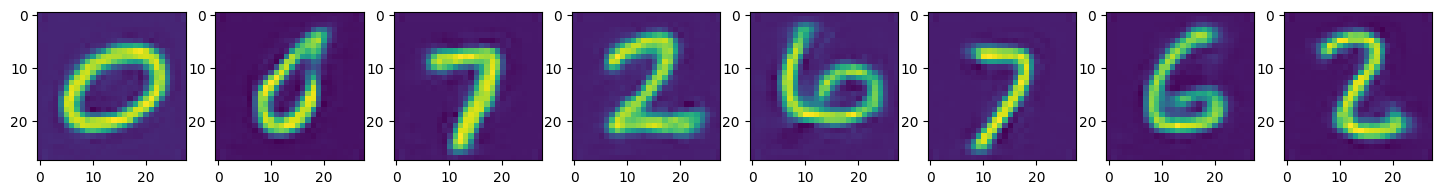

Epochs:    1 | Iteration:  800| Loss: 0.0133391
--------------------------------------------------------------------------------------------------------------------------------------------


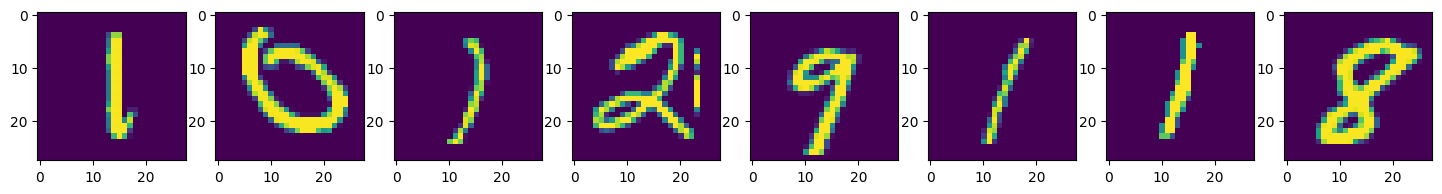

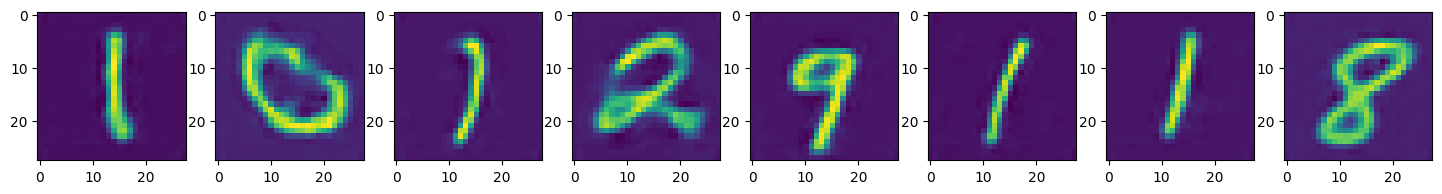

Epochs:    1 | Iteration: 1200| Loss: 0.0128092
--------------------------------------------------------------------------------------------------------------------------------------------


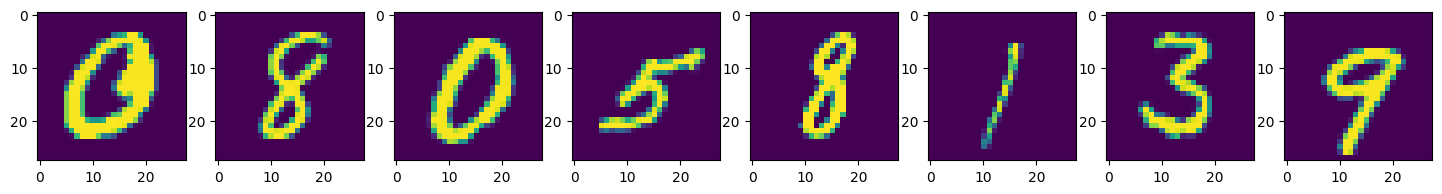

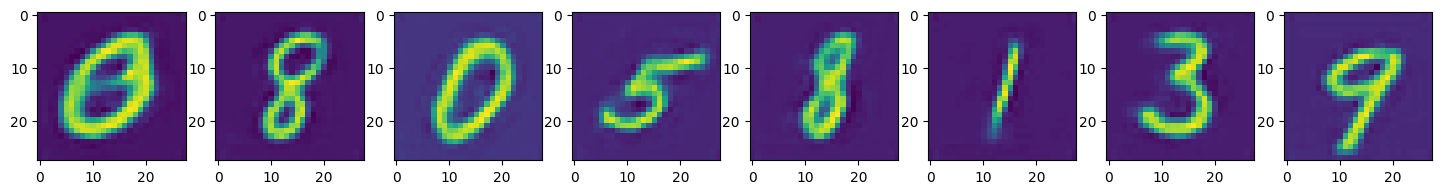

Epochs:    1 | Iteration: 1600| Loss: 0.0110775
--------------------------------------------------------------------------------------------------------------------------------------------


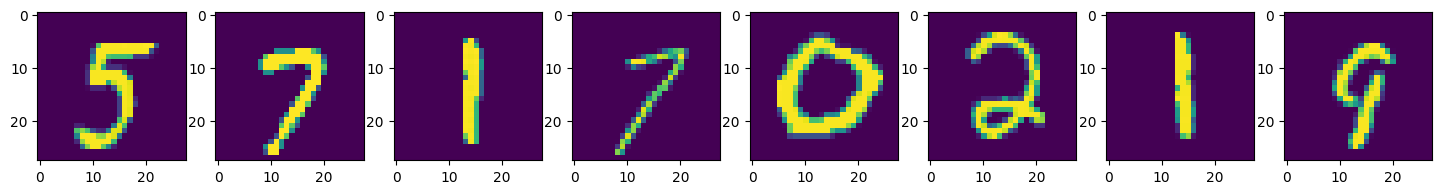

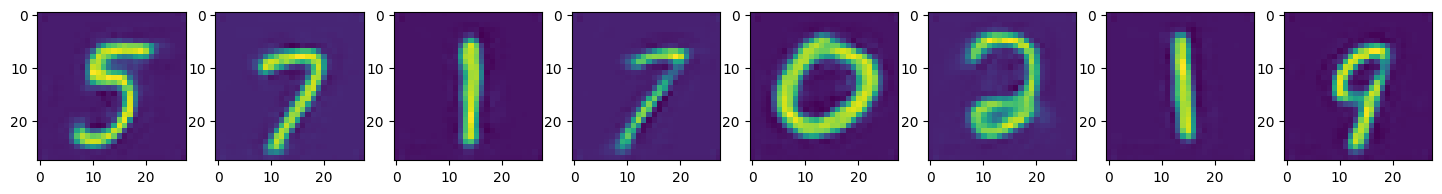

--------------------------------------------------------------------------------------------------------------------------------------------
Traning is finished :) 


In [45]:
train(
    model, 
    criterion, 
    optimizer=opt,
    train_loader=train_loader,
    epochs=2
)

## Save Models AutoEncoder, Encoder, Decoder

In [46]:
torch.save(model.state_dict(), "./models/AutoEncoder_CNN_V4_2_Epochs.pth")

In [47]:
torch.save(model.encoder.state_dict(), "./models/Encoder_CNN_V4_2_Epochs.pth")

In [48]:
torch.save(model.decoder.state_dict(), "./models/Decoder_CNN_V4_2_Epochs.pth")

## Load Model

In [49]:
model = AutoEncoderCNN()

In [50]:
model.load_state_dict(torch.load("./models/AutoEncoder_CNN_V4_2_Epochs.pth"))

<All keys matched successfully>

In [51]:
model

AutoEncoderCNN(
  (encoder): Encoder(
    (conv_encoder): Sequential(
      (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
      (1): Conv2d(10, 8, kernel_size=(3, 3), stride=(1, 1))
      (2): ReLU()
      (3): Conv2d(8, 4, kernel_size=(7, 7), stride=(1, 1))
      (4): Flatten(start_dim=1, end_dim=-1)
    )
    (linear_encoder): Sequential(
      (0): Linear(in_features=1296, out_features=128, bias=True)
      (1): Linear(in_features=128, out_features=32, bias=True)
      (2): ReLU()
      (3): Linear(in_features=32, out_features=100, bias=True)
    )
  )
  (decoder): Decoder(
    (linear_decoder): Sequential(
      (0): Linear(in_features=100, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=1296, bias=True)
      (5): Unflatten(dim=1, unflattened_size=(4, 18, 18))
    )
    (conv_decoder): Sequential(
      (0): ConvTranspose2d(4, 8, kernel_size=(7, 7)

## Applicattions of AutoEncoder

### Dimensionality Reduction

The **AutoEncoder** arhitecture was first proposed as ***Non-Linear generatisation of PCA*** in the paper, titled [Reducing the Dimensionality of Data with Neural Networks](https://sci-hub.ru/https://www.science.org/doi/10.1126/science.1127647). As we see in previous sections, that **AutoEncoders** comes with two networks, the **Encoder** and the **Decoder** network. The **Encoder** tends to learn the features and patters from input data, it try to transform the hight-dimension data to low-dimentional space called **Embeddings** denoted by $Z$. In other hand, the **Decoder** network, tends to restruct the data given the **Embeddings** $Z$. 

In fact, After the **AutoEncoders** model is trainned. We can use the **Encoder** newtork to get a vectors representation of a given input. This represenation can used for : 

- **Classification/Regression Cases**: The **Encoder** is also considered as *feature-extractor*, means during the back-propagation the most important features/patterns. So, we can use it as **Transfer Learning**, which means we can connect to a classifier or regressor to perform a Reression or classification for specific problem.

-  **Compute Similarity**: We can fit two samples, to the Encoder and get their representations, which are vectors, then compute a **Cosine metric** to measure similarity between these inputs.

In this section, we're going to use the pre-trainned AutoEncoder model, gotten in previous section, to perform classification (regression), and measurin similarity between MNSIT images. 

#### MNIST Classification  

In [56]:
# TODO: build a model to classify mnist digits and use the encoder part from pre-trainned autoencoders model. 

#### Images Similarity

In [57]:
# TODO: build a images similrity using the cosine metric.

### Generative modeling & Data Augmentation

#### Generate New Instance of Images

In [552]:
def get_images_of(digit: int = 0, dataset=mnist) -> None:
    return Subset(mnist, [idx for idx, label in enumerate(dataset.targets) if label in [digit]])

In [553]:
mnist

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../files/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Flatten(start_dim=1, end_dim=-1)
           )

In [554]:
zeros = get_images_of(0)

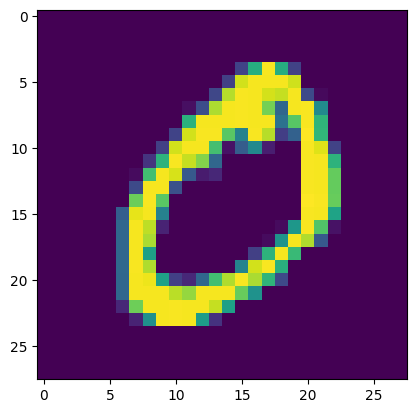

In [555]:
imshow_image(zeros[0][0])

In [556]:
zeros_loader = DataLoader(zeros, batch_size=100)

In [557]:
input = torch.stack([ tensor for i, (tensor, _) in enumerate(zeros_loader) if tensor.shape[0]!=23 and i<=2])

In [558]:
zeros_emb = model.encoder(input)

In [559]:
zeros_mean = zeros_emb.mean(axis=0)

In [560]:
zeros_mean.shape

torch.Size([100])

In [561]:
zeros_std = zeros_emb.std(axis=0)

In [562]:
zeros_std.shape

torch.Size([100])

In [583]:
zeros_emb[1].shape

torch.Size([100])

In [596]:
a = (zeros_emb[10] - zeros_mean[10])/zeros_std[5]

<Axes: ylabel='Count'>

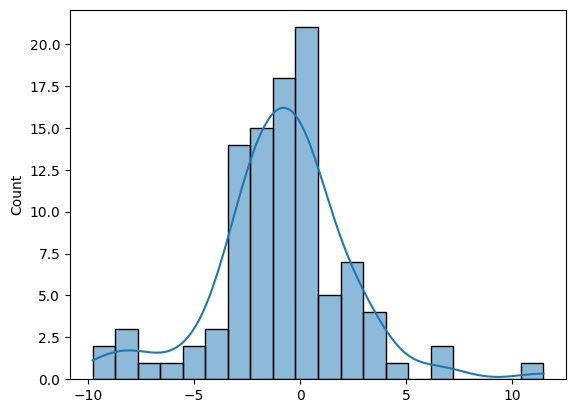

In [597]:
sns.histplot(a.detach().numpy(), bins=20, kde=True)

In [598]:
from sklearn.manifold import TSNE

In [599]:
tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3)

In [600]:
zeros_dist = tsne.fit_transform(zeros_emb.detach().numpy())

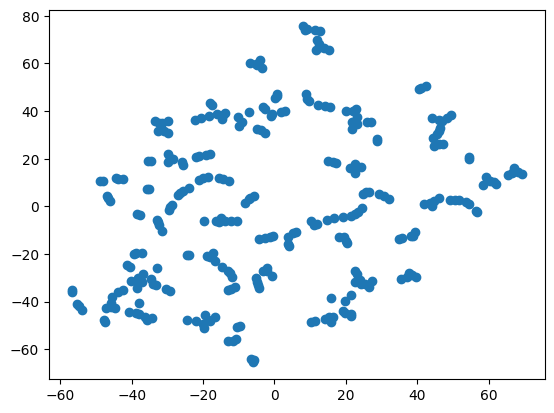

In [601]:
plt.scatter(zeros_dist[:, 0], zeros_dist[:, 1])

In [645]:
z_new = torch.normal(zeros_mean, zeros_std).view(1, -1)

In [646]:
z_new

tensor([[-0.4444, -0.4843, -0.1217,  0.4293, -4.1242,  0.1653, -0.9214, -0.4893,
         -0.0076, -0.6837,  1.4568, -4.2605, -0.4410, -1.6353,  1.6865, -1.3718,
         -1.7945, -0.5416,  1.1536, -1.7961, -2.2547,  0.0370, -0.8644,  2.8425,
          0.5814,  2.1262, -0.0784, -0.7063,  0.0686,  0.1297,  0.2318,  1.4045,
         -0.6122,  0.7514, -0.1790, -0.6330, -0.9379, -0.8052,  1.5036,  1.0929,
         -0.6671,  1.0318,  0.8917, -0.8129,  0.1872,  1.4143, -0.6960, -0.4273,
          1.4674, -1.7910, -1.5916, -0.1555,  2.1687, -3.0254, -1.4209,  0.9788,
          0.2709,  0.3999,  0.6715, -0.2928, -0.0541, -1.1357,  0.5599,  0.3019,
          0.1113,  1.6281, -1.3448,  0.2839, -1.7906, -2.9988, -0.3619, -0.6024,
          0.8620,  2.3657,  0.1752, -2.9499, -0.3196,  1.0706,  0.0961,  0.7851,
         -0.0398,  0.0275, -2.4018, -0.5858, -1.4907,  2.3992,  0.7708, -1.6419,
         -0.1258,  3.7262, -0.4675, -0.5594, -0.5640, -1.1896, -0.1754,  0.3540,
          1.1100, -0.6278, -

In [647]:
gen_img = model.decoder(z_new)

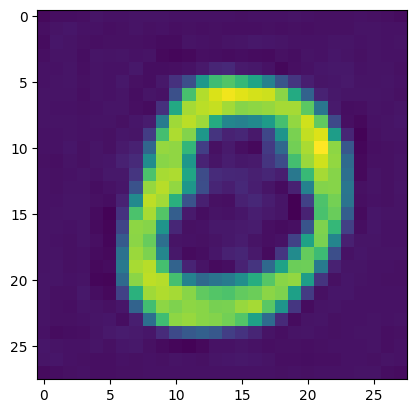

In [648]:
imshow_image(gen_img)

---

## References

- **AutoEncoders** Original Paper by ***G. E. Hinton and R. R. Salakhutdinov*** [Reducing the Dimensionality of Data with Neural Networks](https://sci-hub.ru/https://www.science.org/doi/10.1126/science.1127647)